<a href="https://colab.research.google.com/github/AmanPawar9/Earthquake-Impacts-Dynamic-Properies-of-Soil-prediction-using-ANN/blob/main/MainANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving eo_0_576_po_100_csa_0_050.csv to eo_0_576_po_100_csa_0_050.csv
User uploaded file "eo_0_576_po_100_csa_0_050.csv" with length 4054702 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('eo_0_576_po_100_csa_0_050.csv')
df.shape

(102399, 6)

In [ ]:
df.head()

,time_min,eps_a,eps_v,sigmaP_3_kPa,sigma_3_kPa,sigma_d_kPa
0,0.001,-0.000083,0,101.64,365.17,-0.509080
1,0.002,0.000099,0,101.53,365.17,-0.066734
2,0.003,0.000349,0,101.37,365.16,0.556040
3,0.004,0.000666,0,101.15,365.15,1.370160
4,0.005,0.001054,0,100.89,365.15,2.384600


In [ ]:
df = df.drop('eps_v', axis=1)

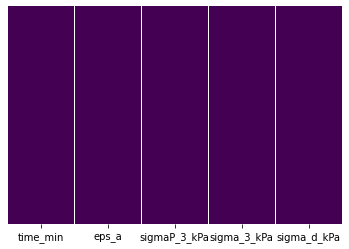

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.head()

,time_min,eps_a,sigmaP_3_kPa,sigma_3_kPa,sigma_d_kPa
0,0.001,-0.000083,101.64,365.17,-0.509080
1,0.002,0.000099,101.53,365.17,-0.066734
2,0.003,0.000349,101.37,365.16,0.556040
3,0.004,0.000666,101.15,365.15,1.370160
4,0.005,0.001054,100.89,365.15,2.384600


In [ ]:
df=df.dropna()

In [ ]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

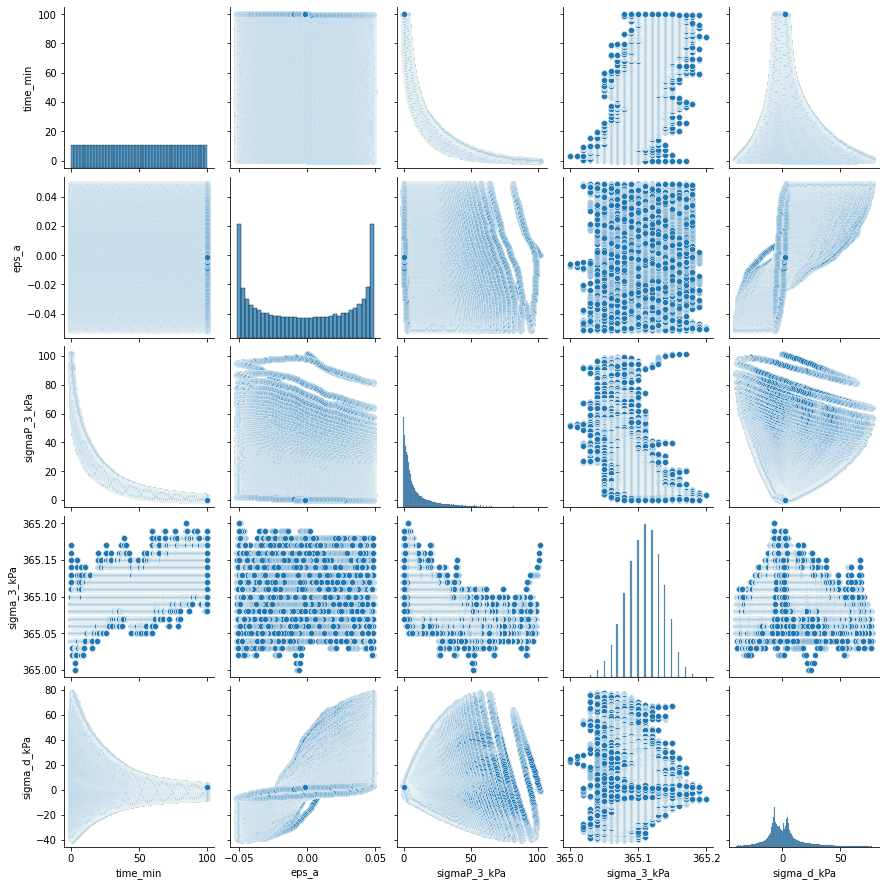

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,time_min,eps_a,sigmaP_3_kPa,sigma_3_kPa,sigma_d_kPa
time_min,1.000000,-0.003904,-0.777869,0.707950,-0.233689
eps_a,-0.003904,1.000000,-0.200038,0.112984,0.702852
sigmaP_3_kPa,-0.777869,-0.200038,1.000000,-0.651749,-0.005669
sigma_3_kPa,0.707950,0.112984,-0.651749,1.000000,-0.090513
sigma_d_kPa,-0.233689,0.702852,-0.005669,-0.090513,1.000000


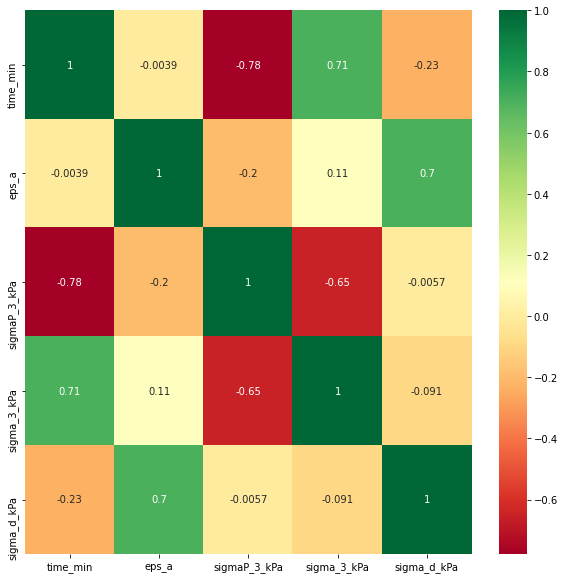

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
corrmat.index

Index(['time_min', 'eps_a', 'sigmaP_3_kPa', 'sigma_3_kPa', 'sigma_d_kPa'], dtype='object')

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
X.head()

,time_min,eps_a,sigmaP_3_kPa,sigma_3_kPa
0,0.001,-0.000083,101.64,365.17
1,0.002,0.000099,101.53,365.17
2,0.003,0.000349,101.37,365.16
3,0.004,0.000666,101.15,365.15
4,0.005,0.001054,100.89,365.15


In [ ]:
print(model.feature_importances_)

[0.29229158 0.53532286 0.15144906 0.02093651]


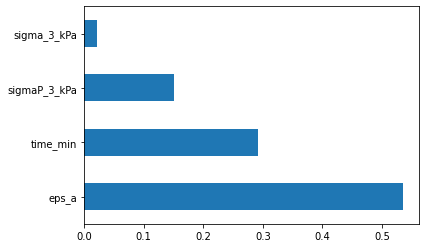

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


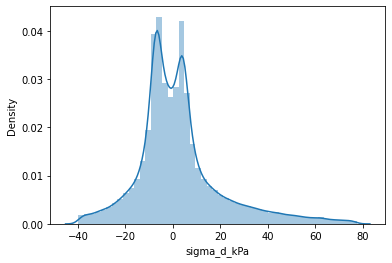

In [ ]:
sns.distplot(y)

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.00000000e+00, 5.12639487e-01, 1.00000000e+00, 8.50000000e-01],
       [1.00002000e-05, 5.14449415e-01, 9.98918919e-01, 8.50000000e-01],
       [2.00004000e-05, 5.16938692e-01, 9.97346437e-01, 8.00000000e-01],
       ...,
       [9.99980000e-01, 4.92670361e-01, 1.67076167e-03, 4.50000000e-01],
       [9.99990000e-01, 4.96199151e-01, 1.47420147e-03, 4.50000000e-01],
       [1.00000000e+00, 5.00127559e-01, 1.27764128e-03, 4.00000000e-01]])

In [ ]:
y= y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[0.33473417],
       [0.33850671],
       [0.34381804],
       ...,
       [0.35584065],
       [0.35633582],
       [0.35690723]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Normalization
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.25, batch_size = 10, epochs = 100)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_82 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_83 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_84 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5760/5760 [==============================] - 24s 4ms/step - loss: 7.5538 - mean_absolute_error: 7.553

In [ ]:
prediction=NN_model.predict(X_test)

In [ ]:
y_test

21149    33.0500
17463    35.8480
2891    -36.9360
44502    -2.4302
21817   -19.3710
          ...   
42162     9.6620
12264     6.7682
23920   -19.5810
75844     5.3096
34934    22.1440
Name: sigma_d_kPa, Length: 25600, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


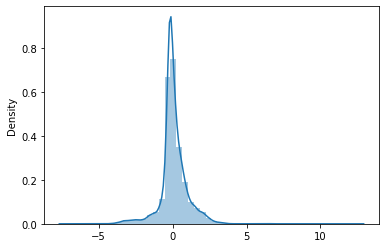

In [ ]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

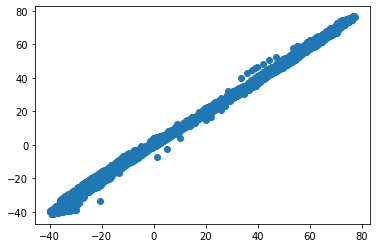

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.5903689122851654
MSE: 0.8677535398855554
RMSE: 0.9315328979083645
